A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")

df.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [29]:
df["% Goals-to-shots"]= df["% Goals-to-shots"].replace({'\%':''}, regex = True).astype("float",copy=False)
df["Saves-to-shots ratio"]= df["Saves-to-shots ratio"].replace({'\%':''}, regex = True).astype("float",copy=False)
df["Passing Accuracy"]= df["Passing Accuracy"].replace({'\%':''}, regex = True).astype("float",copy=False)
df["Goals"]=df["Goals"].astype("int64",copy=False)
df["Shooting Accuracy"]= df["Shooting Accuracy"].replace({'\%':''}, regex = True).astype("float",copy=False)/100

In [30]:
df.dtypes

Team                           object
Goals                           int64
Shots on target                 int64
Shots off target                int64
Shooting Accuracy             float64
% Goals-to-shots              float64
Total shots (inc. Blocked)      int64
Hit Woodwork                    int64
Penalty goals                   int64
Penalties not scored            int64
Headed goals                    int64
Passes                          int64
Passes completed                int64
Passing Accuracy              float64
Touches                         int64
Crosses                         int64
Dribbles                        int64
Corners Taken                   int64
Tackles                         int64
Clearances                      int64
Interceptions                   int64
Clearances off line           float64
Clean Sheets                    int64
Blocks                          int64
Goals conceded                  int64
Saves made                      int64
Saves-to-sho

<AxesSubplot:>

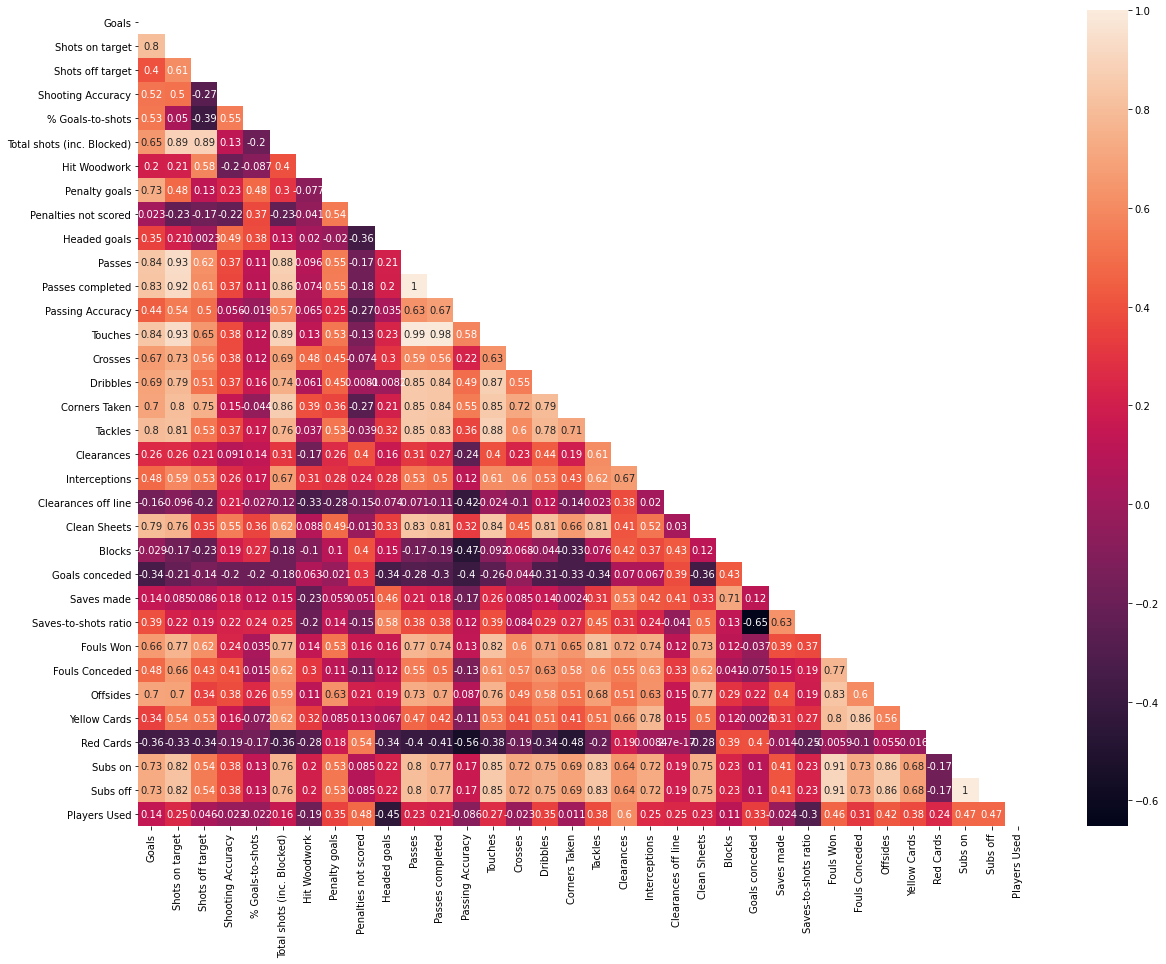

In [31]:
matriz = np.triu(df.corr())
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, mask=matriz)

In [32]:

triangulo_superior = df.corr().where(
np.triu(np.ones(matriz.shape), k=1).astype(np.bool))
  
pares_correlacion = triangulo_superior.unstack().dropna().sort_values()



ipykernel_launcher:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [33]:
print(pares_correlacion)

Saves-to-shots ratio  Goals conceded     -0.650997
Red Cards             Passing Accuracy   -0.559696
                      Corners Taken      -0.481090
Blocks                Passing Accuracy   -0.472365
Players Used          Headed goals       -0.447214
                                            ...   
Touches               Shots on target     0.934623
                      Passes completed    0.984324
                      Passes              0.993044
Passes completed      Passes              0.997697
Subs off              Subs on             1.000000
Length: 561, dtype: float64


In [34]:
correlaciones =df["Goals"].corr(df["Shooting Accuracy"])

In [35]:
print(correlaciones)

0.5212095324544345


In [36]:
X = np.array(df["Shooting Accuracy"]).reshape(-1,1)
y = np.array(df["Goals"])

In [37]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

svr = svm.SVR(C=37,gamma=100,kernel="linear")
svr.fit(X_train,y_train)
y_pred = svr.predict(X_train)
print ('score train :', svr.score(X_train, y_train))
print ('score test: ', svr.score(X_test, y_test))
print ('score total:', svr.score(X, y))
print("Score R2:", r2_score(y_train, y_pred))

print("y_pred:",y_pred)
print("y_test:",y_train)


score train : 0.19633942465401133
score test:  -0.19724069432286107
score total: 0.15270007897801952


NameError: name 'r2_score' is not defined

In [120]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
polinominal_model = PolynomialFeatures(3) 
X_poly = polinominal_model.fit_transform(X, y)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 10)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_poly, y_train)
y_pred = lin_reg_model.predict(X_train_poly)
lin_reg_model.coef_ 
print("Coeficiente:", lin_reg_model.coef_)
print ('score train :', lin_reg_model.score(X_train_poly, y_train))
print ('score test: ', lin_reg_model.score(X_test_poly, y_test))
print ('score total:', lin_reg_model.score(X_poly, y))
print("Score R2:", r2_score(y_train, y_pred))
print ('coeficiente:', lin_reg_model.coef_)
print("y_pred:",y_pred)
print("y_test:",y_train)

Coeficiente: [    0.           650.99437068 -1889.14564875  1746.6581691 ]
score train : 0.7180192615053652
score test:  -3.483789096939649
score total: 0.1834188079201422
Score R2: 0.7180192615053652
coeficiente: [    0.           650.99437068 -1889.14564875  1746.6581691 ]
y_pred: [ 4.79343143  4.41819016  3.96859668  3.99271094  3.22644713  3.18092979
  2.1970938   2.0402867   5.63352971  2.90572718 11.13419605  2.50886042]
y_test: [ 5  2  6  4  1  5  2  4  4  3 12  2]


In [141]:
lin_reg_model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
lin_reg_model.fit(X_train, y_train)
y_pred = lin_reg_model.predict(X_train)
lin_reg_model.coef_ 
print("Coeficiente:", lin_reg_model.coef_)
print ('score train :', lin_reg_model.score(X_train, y_train))
print ('score test: ', lin_reg_model.score(X_test, y_test))
print ('score total:', lin_reg_model.score(X, y))
print("Score R2:", r2_score(y_train, y_pred))
print ('coeficiente:', lin_reg_model.coef_)
print("y_pred:",y_pred)
print("y_test:",y_train)

Coeficiente: [2.0737489]
score train : 0.2945751087210654
score test:  -5.538266739764512
score total: 0.23649658624917447
Score R2: 0.2945751087210654
coeficiente: [2.0737489]
y_pred: [52.55926251 29.74802458 31.82177349 31.82177349 35.96927129 31.82177349
 33.89552239 40.1167691  40.1167691  38.04302019 38.04302019 38.04302019]
y_test: [55 36 25 39 50 21 37 43 34 22 50 30]


In [121]:
df["Goals"]=df["Goals"].astype("object",copy=False)

In [23]:
df.columns

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

In [ ]:
% de goles por disparo: 40%
Total shots (inc. Blocked): 102
Corners Taken: 5
Passes: 82
Dribbles: 23

In [10]:
X = np.array(df[["% Goals-to-shots","Total shots (inc. Blocked)","Corners Taken","Passes","Dribbles"]])

y = np.array(df['Goals']).reshape(-1,1)
y.shape

(16, 1)

In [39]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
model = linear_model.LogisticRegression(max_iter=10000000)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
model.fit(X_train,y_train)

print("Coeficiente:", model.coef_)
print ('score train :', model.score(X_train, y_train))
print ('score test: ', model.score(X_test, y_test))
print ('score total:', model.score(X, y))


print("y_test:",y_train)
predict = model.predict([[40,102,5,82,23]])

Coeficiente: [[-0.00480888]
 [-0.25380927]
 [ 0.00606372]
 [ 0.12566245]
 [-0.08371576]
 [ 0.02662847]
 [ 0.18397928]]
score train : 0.25
score test:  0.25
score total: 0.25
y_test: [12  1  2  2  4  2  3  6  6  5  5  5]


ValueError: X has 5 features per sample; expecting 1

In [22]:
print(predict)

[1]


In [18]:
X = np.array(df[["% Goals-to-shots","Total shots (inc. Blocked)","Corners Taken","Passes","Dribbles"]])

y = np.array(df['Goals']).reshape(-1,1)

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X_train,y_train)


print ('score train :', rf.score(X_train, y_train))
print ('score test: ', rf.score(X_test, y_test))
print ('score total:', rf.score(X, y))


print("y_test:",y_train)
predict = model.predict([[40,102,5,82,23]])

ipykernel_launcher:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
score train : 0.943202482879719
score test:  0.13967175757575767
score total: 0.78652676
y_test: [[12]
 [ 1]
 [ 2]
 [ 2]
 [ 4]
 [ 2]
 [ 3]
 [ 6]
 [ 6]
 [ 5]
 [ 5]
 [ 5]]


In [47]:
print(predict)

[2]


In [44]:
X = np.array(df[["% Goals-to-shots","Total shots (inc. Blocked)","Corners Taken","Passes","Dribbles"]])

y = np.array(df['Goals']).reshape(-1,1)
from sklearn import svm
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
model = svm.LinearSVC()
model.fit(X_train,y_train)

print("Coeficiente:", model.coef_)
print ('score train :', model.score(X_train, y_train))
print ('score test: ', model.score(X_test, y_test))
print ('score total:', model.score(X, y))


print("y_test:",y_train)
predict = model.predict([[40,102,5,82,23]])

Coeficiente: [[-4.25855756e-03 -2.07817605e-05 -5.84851490e-03 -1.18582254e-04
  -1.58343637e-02]
 [-1.42091040e-02  1.72373996e-02  4.53744556e-03 -1.20911468e-03
   6.36096312e-05]
 [-6.24732292e-03 -4.20608880e-03  3.76656516e-03 -1.20342647e-03
   8.06848403e-03]
 [ 1.03338101e-02 -1.63219702e-02  2.59062103e-03 -1.36640100e-04
  -6.04433834e-03]
 [ 1.44237293e-02 -9.70014701e-03 -4.92462108e-03 -9.68775527e-04
   2.33652951e-02]
 [-6.79534696e-03  1.04493458e-02  9.38116128e-03 -1.01326976e-03
   6.23395197e-04]
 [-3.39014618e-03 -1.14043333e-02 -4.12863541e-04 -3.59529150e-04
  -2.60732323e-03]]
score train : 0.4166666666666667
score test:  0.25
score total: 0.375
y_test: [[12]
 [ 1]
 [ 2]
 [ 2]
 [ 4]
 [ 2]
 [ 3]
 [ 6]
 [ 6]
 [ 5]
 [ 5]
 [ 5]]
C:\Users\Administrator\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

In [45]:
predict


array([2], dtype=int64)